<a href="https://colab.research.google.com/github/stephkariuki19/colab-notebooks/blob/main/CLASS_EXE_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Replace 'your_file.csv' with the actual filename
df = pd.read_csv('new_filtered_data.csv')


Saving new_filtered_data.csv to new_filtered_data.csv


In [ ]:
 # view the loaded the data
df.head()

In [ ]:
num_rows = len(df)

print(f"The CSV file has {num_rows} rows.")

In [ ]:
unique_names = df['Name'].unique()

# Print or display the unique values
print(unique_names)


In [3]:
# Create a mapping between string values and numerical codes
code_mapping = {code: idx for idx, code in enumerate(df['Code'].unique())}

# Map the string values to numerical codes
df['Code'] = df['Code'].map(code_mapping)
# Assuming 'df' is your DataFrame and 'Code' is the column of interest
largest_value = df['Code'].max()

print("The largest value in the 'Code' column is:", largest_value)
# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Extract relevant date features
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Optionally, you can add more features like day of the week or quarter
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['quarter'] = df['date'].dt.quarter

# Drop the original 'date' column
df = df.drop('date', axis=1)

 # view the loaded the data
df.head()



The largest value in the 'Code' column is: 19


,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,day,month,year,day_of_week,quarter
0,3-Jan-22,0,Kakuzi Plc,355.0,427.00,385.0,385.0,385.00,385.00,-,-,-,-,3,1,2022,0,1
1,3-Jan-22,1,Williamson Tea Kenya Plc,125.0,154.75,132.0,132.0,132.00,130.00,2,1.54%,"15,000",-,3,1,2022,0,1
2,3-Jan-22,2,ABSA Bank Kenya Plc,8.6,12.95,11.6,11.9,11.75,11.85,-0.1,0.84%,"57,700",-,3,1,2022,0,1
3,3-Jan-22,3,BK Group Plc,24.3,40.00,29.0,29.0,29.00,29.00,-,-,-,-,3,1,2022,0,1
4,3-Jan-22,4,Equity Group Holdings Plc,39.0,55.00,51.0,54.5,52.75,52.75,-,-,"4,702,000",-,3,1,2022,0,1


In [ ]:
df.tail()

In [ ]:
columns_to_replace = ['Volume', 'Change', 'Change%']

# Remove '-' with 0 and remove commas in the specified columns
df[columns_to_replace] = df[columns_to_replace].replace('-', '0', regex=True)
df[columns_to_replace] = df[columns_to_replace].replace(',', '', regex=True)
df[columns_to_replace] = df[columns_to_replace].replace('%', '', regex=True)

# Convert the columns to numeric type
df[columns_to_replace] = df[columns_to_replace].astype(float)

# Check for any remaining non-numeric values in these columns
for col in columns_to_replace:
    non_numeric_values = df[col].loc[~df[col].apply(lambda x: isinstance(x, (int, float)))].unique()
    if non_numeric_values.size > 0:
        print(f"Non-numeric values in column '{col}': {non_numeric_values}")
df.head()

In [ ]:
# Print/display data for a specific company
zero_code_rows = df[df['Code'] == 0]

print(zero_code_rows)

In [ ]:
#Putting Feature Variable to X and Target variable to y.
#feature variables

columns_to_drop = ['Day Price', 'Date','Name','Adjusted Price','Change%']
X_feature = df.drop(columns=columns_to_drop, axis=1).values

# Target variable
y_target = df['Day Price'].values


In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((1428, 13), (612, 13))

In [ ]:
#TESTT
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Adjust the number of trees
    'min_samples_leaf': [1, 2, 3]     # Adjust the min samples in leaf nodes
}

# Create RandomForestRegressor object
regressor = RandomForestRegressor(random_state=42, oob_score=True)

# Perform GridSearchCV with cross-validation and OOB scoring
grid_search = GridSearchCV(regressor, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_regressor = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_regressor.predict(X_test)

# Evaluate the best model
score = best_regressor.score(X_test, y_test)
print("Best model R-squared score:", score)
print("Best parameters:", grid_search.best_params_)


Best model R-squared score: 0.9999498676396728
Best parameters: {'min_samples_leaf': 1, 'n_estimators': 300}


In [ ]:
from sklearn.metrics import mean_squared_error
import math  # Import the math module for square root calculation

# Compute mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate square root of MSE using math module
rmse = math.sqrt(mse)
# or directly using the exponentiation operator **
# rmse = mse ** 0.5

# Print results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 0.37724414474763984
Root Mean Squared Error: 0.6142020390292106


Mean Absolute Error (MAE): 0.1747848039215692
Mean Squared Error (MSE): 0.37724414474763984
Root Mean Squared Error (RMSE): 0.6142020390292106
R-squared (R2): 0.9999498676396728


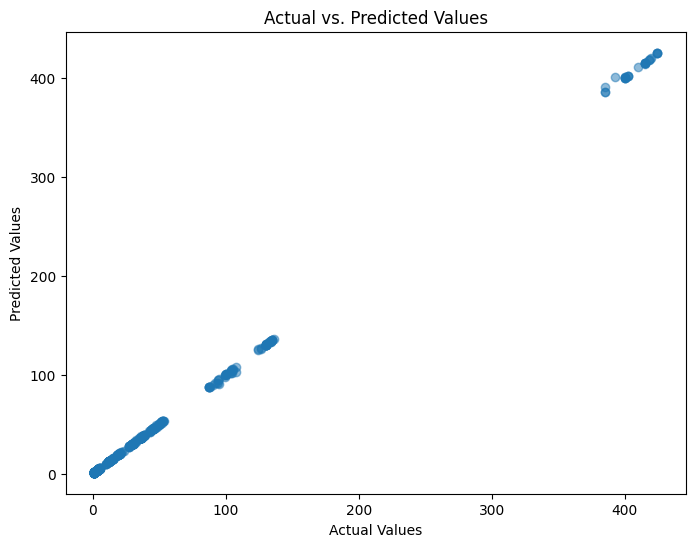

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt, seaborn as sns
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


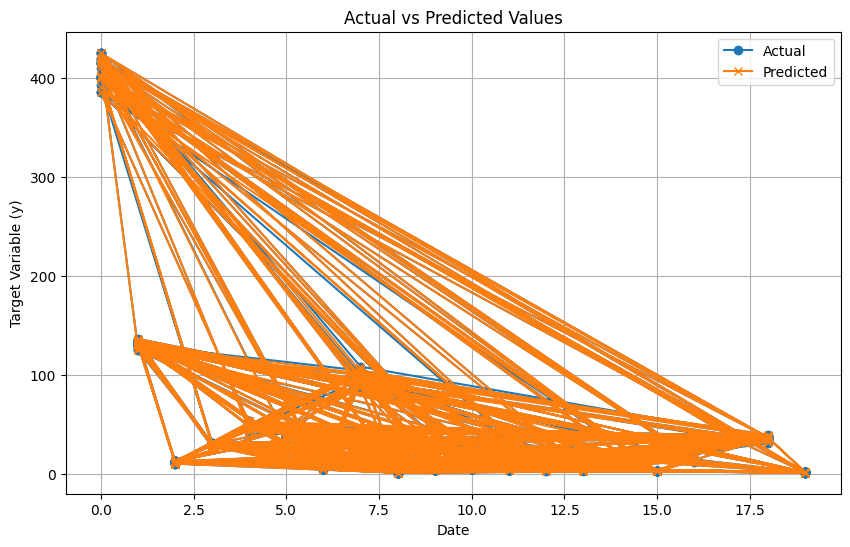

In [ ]:
import matplotlib.pyplot as plt

# Assuming Date is the first column in X_test
dates = X_test[:, 0]  # Replace 0 with the column index of Date in X_test

# Plotting actual versus predicted values
plt.figure(figsize=(10, 6))
plt.plot(dates, y_test, label='Actual', marker='o')
plt.plot(dates, y_pred, label='Predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('Target Variable (y)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
